# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Ход исследования:

1. Загрузка данных  
2. Предобработка данных
3. Добавление необходимых вспомогательных столбцов
4. Проведение исследовательского анализа данных
5. Общий вывод

1 Откройте файл с данными и изучите общую информацию

In [1]:
# позовем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# прочитаем файл и сохраним его в df
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
# выведем первые 10 строк таблицы
df.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Каждая строка таблицы — это действительно данные объявления о продаже квартиры. 

In [4]:
# получение общей информации о данных в таблице
df.info()
print('\nЧисло дубликатов:', df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца, а всего 23699 объявления. Явных дубликатов нет. У ряда столбцов есть пропущенные значения и некорректный тип данных (например для balcony, parks_nearest, first_day_exposition и пр.). Наблюдаются нарушения в стиле наименований столбцов (не соблюдается регистр и пр.).

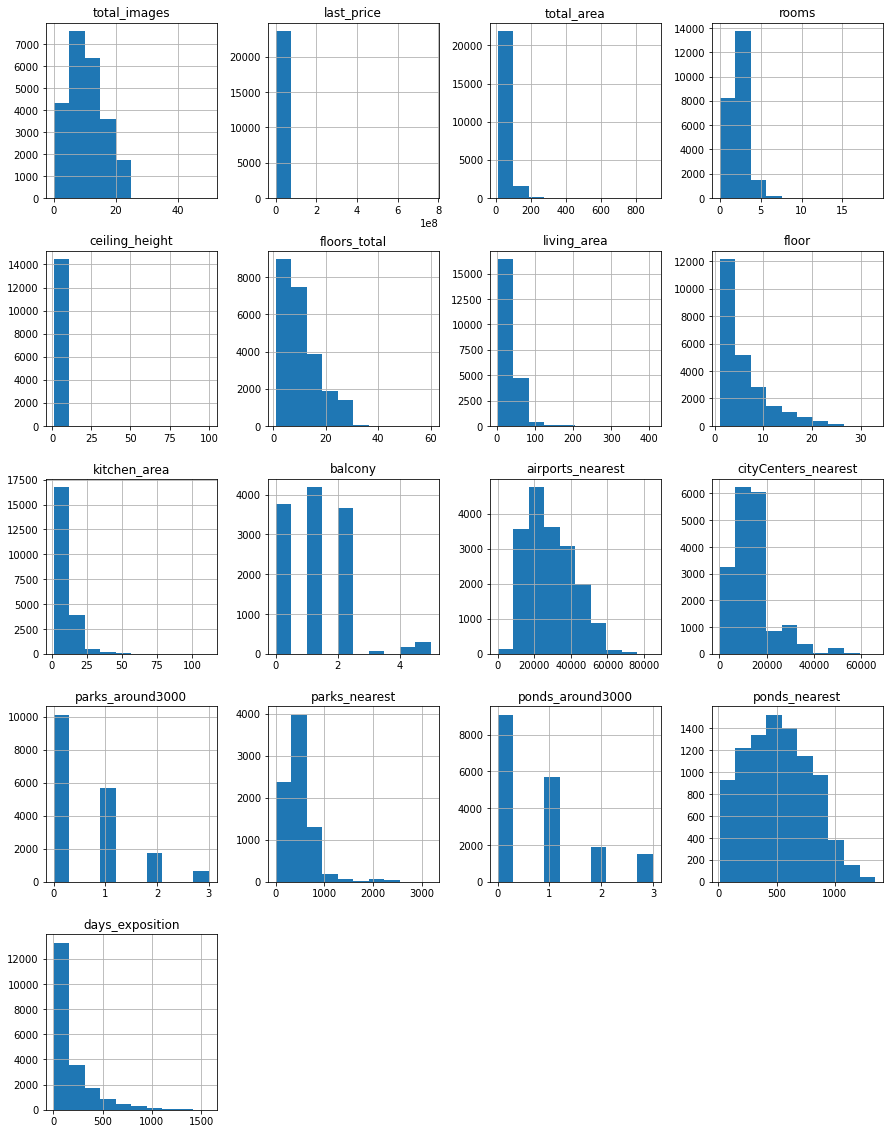

In [5]:
# построим общую гистограмму для всех числовых столбцов таблицы

df.hist(figsize=(15,20))
plt.show()

Вывод:
В каждой строке таблицы находятся данные объявления о продаже квартиры. Присутствуют пропуски в данных, возможны неявные дубликаты, и требуется изменение типа данных в колонках. Вероятно, это связано с ошибками выгрузки данных, выгрузкой из нескольких источников, техническими ошибками или отсутствием необходимой информации при заполнении таблицы пользователями.

2 Предобработка данных

In [6]:
# определим в каких колонках есть пропущенные значения

df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
df['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Столбец total_images: мин фото - 0 ок , макс фото - 50 ок , тип int ок, замечаний нет.

In [8]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Столбец last_price: мин цена - 12190?? возможно цена указана в тыс.руб., надо поправить, макс цена - 
763 000 000 млн.руб наверное ок для Санкт-Петербурга, тип float заменим на int, не будем считать копейки))

In [9]:
# проверим цены в таблице на примере Санкт-Петебурга на соответствие рынку
display(df.loc[(df['last_price']<1000000)&(df['locality_name']=='Санкт-Петербург')])



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


In [10]:
# аномалия одна и это она и есть, поправлю вручную, заодно поменяю тип данных
df['last_price'] = df['last_price'].astype(int)
df.loc[8793, 'last_price'] = 12190000
display(df.loc[(df['last_price']<1000000)& (df['locality_name']=='Санкт-Петербург' )])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [11]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Столбец total_area: мин значение 12 м2 ок, макс значение 900 м2 (видимо это и есть 763 млн) ок,
пропусков нет ок, тип данных float ок замечаний нет.

In [12]:
# сразу переведем тип данных столбца first_day_exposition из object в datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Столбец first_day_exposition: пропусков нет ок, тип данных измененен ок, замечаний нет.

In [13]:
df['rooms'].describe()
#df['rooms'].unique()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Столбец rooms: Пропусков нет ок, мин количество комнат -0?? надо проверить что это,
максимальное - 19 ок, тип данных int ок.

In [14]:
# посмотрю на данные таблицы с нулевым количеством комнат:
df.query('rooms == 0 and (open_plan == True or studio == True)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000,27.70,2017-09-28,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000,29.00,2017-11-11,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


По ряду признаков - это квартиры-студии, либо со свободной планировкой. Вероятно это 
особенность обозначения такого типа жилья.

In [15]:
# для проверки уточним количество комнат во всех студиях
print(len(df.query('studio == True')))
# уникальные значения количества комнат
df.query('studio == True')['rooms'].value_counts()

149


0    138
1     11
Name: rooms, dtype: int64

Единого мнения, как видим нет, некоторые пользователи считают, что комната все же есть. 

In [16]:
# cделаю однообразно, заменю 1 на 0 в 11 объявлениях, все же пространство единое (комната и кухня)
df.loc[(df['rooms'] == 1) & (df['studio']==True),'rooms'] = 0
# проверяю
df.query('studio == True')['rooms'] .value_counts()

0    149
Name: rooms, dtype: int64

Столбец rooms: замечаний нет.

In [17]:
df['ceiling_height'].describe()
#df['ceiling_height'].value_counts()
#df['ceiling_height'].unique()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Столбец ceiling_height: мин высота 1м? макс высота 100?, есть пропущенные значения?, тип данных float ок. Причина пропусков вероятнее всего в игнорировании пользователями заполнения такого рода данных.


In [18]:
# заполню пропуски высот потолков медианой, это надежно
height_median = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(height_median)

# проверю
df.query('ceiling_height.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Столбец ceiling_height: замечаний нет.

In [19]:
df['floors_total'].describe()
#df['floors_total'].value_counts()
#df['floors_total'].unique()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Столбец floors_total: мин значение 1, макс 60, есть пропуски в данных, тип данных float? Поскольку невозможно выяснить этажность, удалим строки, их немного, и поменяем тип данных на int.

In [20]:
# удалю строки с пропусками
df = df.dropna( subset=['floors_total'])
# проверяю
df['floors_total'].isna().sum()

0

In [21]:
# заменю тип данных на int
df['floors_total'] = df['floors_total'].astype(int)

Столбец floors_total: замечаний нет.

In [22]:
df['living_area'].describe()
#df['living_area'].value_counts()
#df['living_area'].unique()

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Столбец living_area: жилая площадь мин 2 м2, макс 409,7 м2, есть пропуски? тип данных float ок.

In [23]:
# пропуски жилой площади заменю на отношение средней жилой площади к жилой площади в строке
living_ratio = df['living_area'].mean() / df['total_area'].mean()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)
# проверим заполнение
df['living_area'].isna().sum()

0

In [24]:
# проверю нет ли нарушений логики, жилая площадь не может быть больше общей площади
df.query('living_area > total_area')['living_area'].count()

0

Столбец living_area: замечаний нет.

In [25]:
df['floor'].describe()
#df['floor'].value_counts()
#df['floor'].unique()

count    23613.000000
mean         5.877313
std          4.873539
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Столбец floor: этаж мин 1, макс 33, пропущенных значений нет, тип данных ок, замечаний нет.

In [26]:
df['is_apartment'].describe()

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

Столбец is_apartment: есть пропуски, булев тип данных, важный параметр, влияющий на цену при прочих равных

In [27]:
# пропущенные значения апартаментов заменю на False
df['is_apartment'] = df['is_apartment'].fillna(False)
# проверю
df['is_apartment'].isna().sum()

0

Столбец is_apartment: замечаний нет

In [28]:
df['studio'].describe()

count     23613
unique        2
top       False
freq      23467
Name: studio, dtype: object

Столбец studio: пропусков нет, тип данных bool ок, замечаний нет.

In [29]:
df['open_plan'].describe()

count     23613
unique        2
top       False
freq      23546
Name: open_plan, dtype: object

Столбец open_plan: пропусков нет, тип данных bool ок, замечаний нет.

In [30]:
df['kitchen_area'].describe()
#df['kitchen_area'].value_counts()
#df['kitchen_area'].unique()

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Столбец kitchen_area: площадь кухни мин 1.3 м2, макс 112 м2, есть пропуски - 
возможно ошибка выгрузки или человеческий фактор, тип данных float ок.

In [31]:
# пропуски площади кухни заменю на отношение средней площади кухни к жилой площади в строке
kitchen_ratio = df['kitchen_area'].mean() / df['total_area'].mean()
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)
# проверю
df['kitchen_area'].isna().sum()

0

Столбец kitchen_area: замечаний нет.

In [32]:
df['balcony'].describe()
#df['balcony'].value_counts()
#df['balcony'].unique()

count    12133.000000
mean         1.154208
std          1.071022
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Столбец balcony: есть пропущенные значения, тип float заменим на int

In [33]:
# пропущенные значения заменю на нули, скорее всего балконов просто нет, заодно поменяю тип данных
df['balcony'] = df['balcony'].fillna(value=0).astype(int)
# проверка
df['balcony'].isna().sum()

0

Столбец balcony: замечаний нет

In [34]:
df['locality_name'].describe()
#df['locality_name'].value_counts()
#df['locality_name'].unique()

count               23565
unique                364
top       Санкт-Петербург
freq                15651
Name: locality_name, dtype: object

Столбец locality_name: есть пропуски в названии населенного пункта, при изучении уникальных значений выявлены неявные дубликаты: различное написания одного населенного пункта затрудняет сортировку и дальнейшую работу с данными, например поселок/посёлок, а также наименование без указания типа населенного пункта. 

In [35]:
# количество значений до обработки данных
len(df['locality_name'].unique())

365

In [36]:
# удалю пропуски, восстановить название невозможно
df = df.dropna(subset=['locality_name'])
# проверю
df['locality_name'].isna().sum()

0

In [37]:
# удалю название типа населенного пункта, оставив только его наименование
# создам словарь для удаления
replace_dict = ['поселок ', 'городского типа ', 'городской ',  'деревня ', 
                'коттеджный ', 'село ', 'посёлок ', 'при железнодорожной станции ',
                'станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ']
# функция
for value in replace_dict:
    df['locality_name'] = df['locality_name'].str.replace(value, '')
# посмотрим, что получилось
sorted(df['locality_name'].unique())


['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

In [38]:
# посмотрим сколько осталось значений
len(df['locality_name'].unique())

305

Столбец locality_name: замечаний нет, удалены строки, в которых не был указан населенный пункт, а также неявные дубликаты, использовался разный стиль написания, что затруднило бы дальнейший анализ данных. Причина вероятно в разных источниках данных, либо субъективный человеческий фактор при заполнении таблицы. Значения столбца locality_name категоризированы по наименованиям населенных пунктов, количество уникальных значений составило 305 шт. 


In [39]:
df['airports_nearest'].describe()
#df['airports_nearest'].value_counts()
#df['airports_nearest'].unique()

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [40]:
# найду и удалю строку, где расстояние до аэропорта = 0
df.query('airports_nearest < 50')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [41]:
df = df.query('airports_nearest != 0')
# проверю
df.query('airports_nearest < 50')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Столбец airports_nearest: расстояние до аэропорта мин 0м, макс 84869м, есть пропуски, тип данных float ок. В объявлениях многих населенных пунктов не указано расстояние до аэропорта. Данное значение определенно заполнялось автоматически, и пропуски свидетельствуют о техническом сбое при заполнении или выгрузке данных. Строка с расстоянием до аэропорта 0м УДАЛЕНА. Без замечаний.


In [42]:
# приведем все-таки в порядок названия столбцов
df = df.rename(
    columns={'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'}
)
# проверим изменения
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Столбец city_centers_nearest: расстояние до центра города СПб, мин 181м, макс 65968м, есть пропуски, тип данных float ок. Данное значение заполняется автоматически при указании локации объекта недвижимости, пропуски свидетельствуют о техническом сбое при заполнении или выгрузке данных. Замечаний пока нет. Оставил как есть.

In [43]:
df['parks_around_3000'].describe()
#df['parks_around_3000'].value_counts()
#df['parks_around_3000'].unique()

count    18064.000000
mean         0.611603
std          0.802097
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

Столбец parks_around_3000: количество парков в радиусе 3000м, мин 0, макс 3, есть пропуски, тип данных float, надо бы поменять на int

In [44]:
# заменим пропуски на 0, поскольку если бы он был, о нем непременно заявили бы
df['parks_around_3000'] = df['parks_around_3000'].fillna(value=0).astype(int)
# проверю
df['parks_around_3000'].isna().sum()


0

Столбец parks_around_3000: замечаний нет

In [45]:
df['parks_nearest'].describe()
#df['parks_nearest'].value_counts()
#df['parks_nearest'].unique()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Столбец parks_nearest: расстояние до парка мин 1м, макс 3190м, есть пропуски, тип данных float ок. Данные подгружаются автоматически при указании локации объекта, видимо технический сбой, оставлю как есть, а там посмотрим.

In [46]:
df['ponds_around_3000'].describe()
df['ponds_around_3000'].value_counts()
#df['ponds_around_3000'].unique()

0.0    9028
1.0    5662
2.0    1883
3.0    1491
Name: ponds_around_3000, dtype: int64

Столбец ponds_around_3000: водоемы в радиусе 3000м, мин 0, макс 3, есть пропуски, тип данных float, поменять бы его на целочисленный

In [47]:
# приведу в целочисленный тип количество прудов, заменю пропущенные значения на 0
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(value=0).astype(int)
# проверка
df.query('ponds_around_3000.isna()')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Столбец ponds_around_3000: водоем если он есть, о нем спешат заявить, поэтому пропуск означает отсутствие такового.

In [48]:
df['ponds_nearest'].describe()
#df['ponds_nearest'].value_counts()
#df['ponds_nearest'].unique()

count    9036.000000
mean      518.289509
std       278.009558
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Столбец ponds_nearest: расстояние до водоема мин 13м, макс 1344м, есть пропуски, тип данных float ок. Данные подгружаются автоматически при указании локации объекта, видимо технический сбой, оставлю как есть, а там посмотрим. Замечаний нет.

In [49]:
df['days_exposition'].describe()
#df['days_exposition'].value_counts()
#df['days_exposition'].unique()

count    20393.000000
mean       180.747315
std        219.736543
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Столбец days_exposition: количество дней размещения объявления, есть пропуски

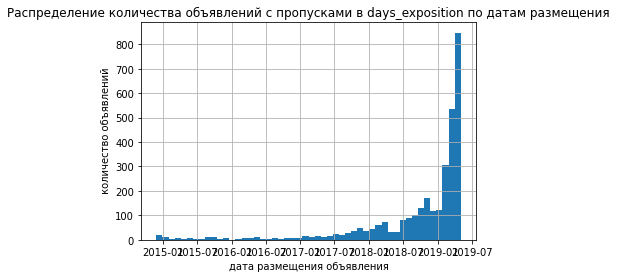

In [50]:
# выберем объявления с пропусками в днях публикации
day_na = df.query('days_exposition.isna()')
# построим гистограмму по дате размещения
day_na['first_day_exposition'].hist(bins=50).set(xlabel='дата размещения объявления',
                              ylabel=' количество объявлений', 
                             title='Распределение количества объявлений с пропусками в days_exposition по датам размещения');


Вероятно, что эти объявления не были закрыты (квартиры не проданы либо не сняты с продажи). 
Чем больше дата, тем больше в базе данных объявлений с пропусками в days_exposition. Заполним пропуски из расчета, что они публиковались до самой поздней даты размещения объявления.

In [51]:
# уточню количество пропусков
df['days_exposition'].isna().sum()

3171

In [52]:
# устанавливаю макс дату
max_dt = df['first_day_exposition'].max()
# заполняю пропуски
df.loc[df['days_exposition'].isna(),
       'days_exposition'] = (max_dt - df.loc[df['days_exposition'].isna(),
       'first_day_exposition']).dt.days
# проверяю
df['days_exposition'].isna().sum()

0

Столбец days_exposition: замечаний нет

   Вывод: 
   В результате предобработки данных пропуски значений были заполнены в зависимости от ситуации:
•	медианой по группам значений либо общей медианой по всем значениям,
•	там, где логически это возможно – конкретными значениями (например False, 0),
•	пропуски значений столбца days_exp заполнены разностью между значением first_day_exp и макс. датой в днях поля first_day_exp. 
    Когда заполнение пропусков было невозможно, строки были удалены (отсутствие наименования в locality_name, количество этажей в доме floors_total). Значения столбца locality_name категоризированы по наименованиям населенных пунктов. 
    Также в отдельных случаях пропуски были оставлены без изменений.
    Причины пропусков: незаполнение пользователем в случае отсутствия информации, сбор данных из разных источников с изначально отличающейся структурой данных, сбой при выгрузке данных.
Во всех столбцах проверены и изменены при необходимости типы данных.

3 Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец с ценой одного квадратного метра и приведем типу int

In [53]:
df['price_of_square_meter'] = df['last_price']/df['total_area']
df['price_of_square_meter'] = df['price_of_square_meter'].astype(int)

Добавим столбец день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [54]:
df['day_of_the_week_exposition'] = df['first_day_exposition'].dt.weekday

Добавим месяц публикации объявления

In [55]:
df['month_exposition'] = df['first_day_exposition'].dt.month

Добавим год публикации объявления

In [56]:
df['year_exposition'] = df['first_day_exposition'].dt.year

Создадим столбец с типом этажа квартиры (значения - "первый", "последний", "другой"

In [57]:
# напишем функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_group, axis=1)

Добавим столбец с расстоянием до центра города в километрах

In [58]:
df['city_centers_nearest_km'] = round(df['city_centers_nearest'] / 1000, 0)

In [59]:
# посмотрим
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_of_square_meter,day_of_the_week_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,57.0,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.810749,9,False,...,84.0,3,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0


Вывод: в датасет были добавлены новые столбцы с заданными параметрами для дальнейшего исследования.

4 Проведите исследовательский анализ данных

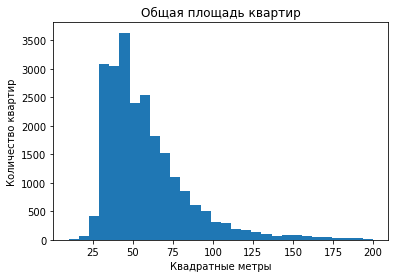

Наибольшие по площади варианты:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
15016    500.0
5893     500.0
12401    495.0
Name: total_area, dtype: float64


In [60]:
# изучим общую площадь квартир
plt.hist(df['total_area'], bins=30, range=(10,200))
plt.title('Общая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(df['total_area'].sort_values(ascending=False).head(10))

Большинство квартир выставленных на продажу менее 100 квадратных метров. В подборке есть несколько очень больших вариантов с площадью более 200 квадратных метров.

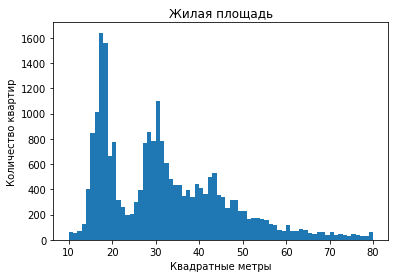

Наибольшие по жилой площади варианты:
19540    409.700000
5358     409.000000
3117     360.387312
12401    347.500000
4237     332.000000
12859    322.300000
660      312.500000
8018     301.500000
14088    300.000000
5893     285.568393
Name: living_area, dtype: float64


In [61]:
# изучим жилую площадь квартир
plt.hist(df['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(df['living_area'].sort_values(ascending=False).head(10))

Самые распространённые варианты с жилой площадью от 10 до 50 метров. После 80 метров встречаются единичные случаи. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.

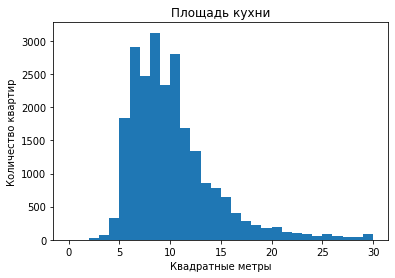

Наибольшие по площади кухни варианты:
19540    112.000000
20215    107.000000
2489     100.700000
5358     100.000000
16239     93.200000
16797     93.000000
15016     87.537363
10867     87.200000
9826      86.504422
492       77.000000
Name: kitchen_area, dtype: float64


In [62]:
# изучим площадь кухни
plt.hist(df['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(df['kitchen_area'].sort_values(ascending=False).head(10))

Самые распространённые варианты квартир с кухнями от 5 до 15 метров. Больше 20 метров кухни немного. Больше 30 - единичные случаи.

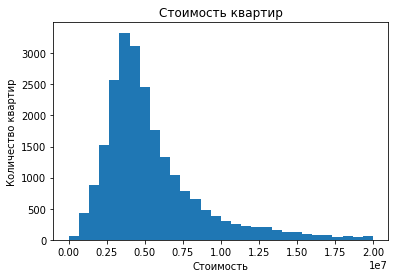

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


In [63]:
# изучим цены объектов
plt.hist(df['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(df['last_price'].sort_values(ascending=False).head(10))

Основная стоимость квартир в районе 4-5 миллионов рублей. С увеличением цены объявлений становится значительно меньше. Есть яркие представители премиум сегмента в выборке с лидером цены в 763 миллиона рублей.

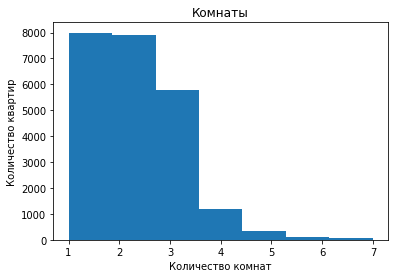

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int64


In [64]:
# изучим количество комнат
plt.hist(df['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(df['rooms'].sort_values(ascending=False).head(10))

В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Однако есть и варианты, где больше 7 комнат, их небольшое количество. А вот лидеры с 10-19 комнатами возможно представляют собой загородный дом.

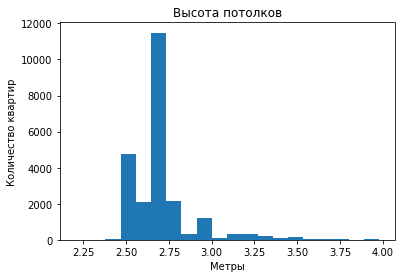

Наибольшие по высоте потолков варианты:
22869    100.0
22336     32.0
3148      32.0
21377     27.5
10773     27.0
17857     27.0
4876      27.0
22938     27.0
5246      27.0
5807      27.0
Name: ceiling_height, dtype: float64


In [65]:
# изучим потолки
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(df['ceiling_height'].sort_values(ascending=False).head(10))

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Есть варианты с высотой потолка 4 метра - такие существуют в домах новых проектах. Есть значения в 27 метров (высота 9-этажного дома), 32 метра, 100 метров - это ошибка при заполнении данных пользователем.

In [66]:
# еще внимательней посмотрим на высоту потолков
round(df['ceiling_height'],0).value_counts()

3.0      19544
2.0       3586
4.0        390
5.0          9
27.0         8
25.0         7
8.0          4
6.0          4
1.0          2
32.0         2
28.0         1
100.0        1
24.0         1
14.0         1
26.0         1
10.0         1
23.0         1
20.0         1
Name: ceiling_height, dtype: int64

In [67]:
# предположим, что высота потолков более 10 м это ошибка в заполнении данных
# поэтому все значения > 19м нужно поделить на 10
def ceiling_height_more_ten(row):
    if row['ceiling_height'] > 19:
        return row['ceiling_height'] * 0.1
    else:
        return row['ceiling_height']
# присвою новые значения
df['ceiling_height'] = df.apply(ceiling_height_more_ten, axis=1)
# проверю
round(df['ceiling_height'],0).value_counts()

3.0     19556
2.0      3596
4.0       390
5.0         9
8.0         4
6.0         4
10.0        2
1.0         2
14.0        1
Name: ceiling_height, dtype: int64

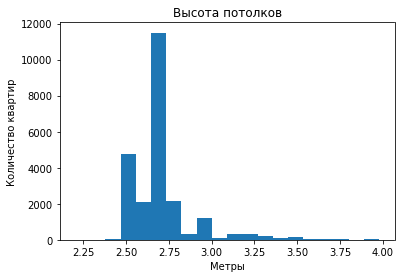

Наибольшие по высоте потолков варианты:
15061    14.0
22309    10.3
22869    10.0
5863      8.3
15743     8.0
17442     8.0
3474      8.0
20264     6.0
21227     5.8
1388      5.6
Name: ceiling_height, dtype: float64


In [68]:
# изучим потолки
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(df['ceiling_height'].sort_values(ascending=False).head(10))

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Есть варианты с высотой потолка 4 метра - такие существуют в домах новых проектов. Наибольшие по высоте значение скорее всего имеют отношение к частным домовладениям. Аномально большие значения больше 19 метров привели в чувство.

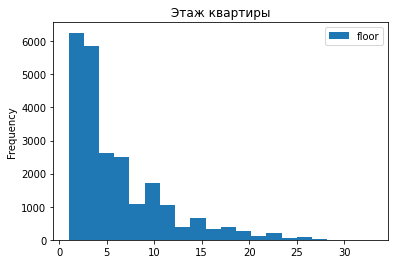

In [69]:
# изучим этаж квартиры
df.plot(kind='hist', title='Этаж квартиры', y='floor', bins=20, figsize=(6,4))
plt.show()

Большое количество значений до 5-ти этажей включительно. Это говорит о целом ряде предложений из пятиэтажной застройки. Также прослеживается вторая категория от 6 до 9 этажа. Вероятно это дома ранней постройки.

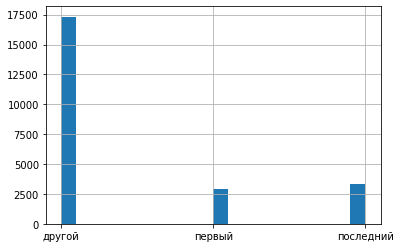

In [70]:
# изучим тип этажа квартиры ("первый", "последний", "другой")
df['floor_type'].hist(bins=20, figsize=(6,4))
plt.show()

In [71]:
df['floor_type'].value_counts()

другой       17325
последний     3330
первый        2909
Name: floor_type, dtype: int64

Ничего определенного сказать немогу кроме соответствия данным в объявлениях.

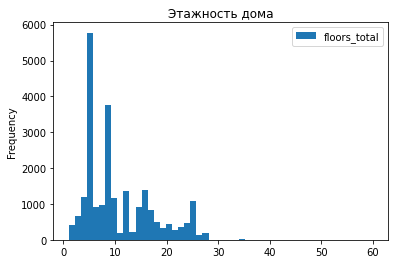

In [72]:
# изучим общее количество этажей в доме
df.plot(kind='hist', title='Этажность дома', y='floors_total', bins=50, figsize=(6,4))
plt.show()

Подтверждается гипотеза о большом количестве продаваемых квартир в домах этажности 5 и 9 этажей.

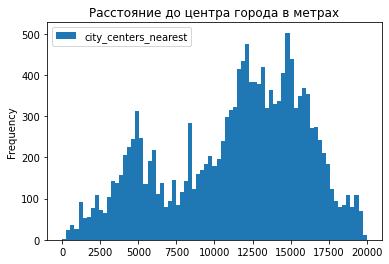

In [73]:
# изучим расстояние до центра города в метрах
df.plot(kind='hist', title='Расстояние до центра города в метрах', y='city_centers_nearest', \
                  bins=75, figsize=(6,4), range= (0,20000))
plt.show()

На диаграмме распределения расстояния до центра города несколько пиков. Предположу, что это связано с неравномерностью плотности жилой застройки.

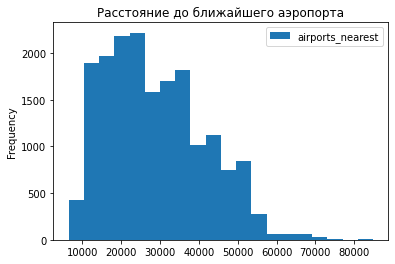

Наибольшие расстояния до аэропорта:
9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
18884    81607.0
2974     81355.0
4441     78527.0
939      75646.0
376      73827.0
Name: airports_nearest, dtype: float64


In [74]:
# изучим расстояние до ближайшего аэропорта
df.plot(kind='hist', title='Расстояние до ближайшего аэропорта', y='airports_nearest', \
                  bins=20, figsize=(6,4))
plt.show()
print('Наибольшие расстояния до аэропорта:')
print(df['airports_nearest'].sort_values(ascending=False).head(10))

Большая часть лотов удалена от аэропорта на расстояние от 8 до 60 км. Это не удивительно, учитывая, что аэропорт Пулково для СПб и Ленобласти всего ОДИН.

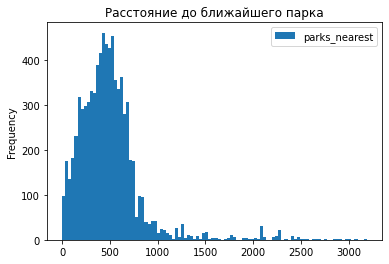

In [75]:
# изучим рассточние до ближайшего парка
df.plot(kind='hist', title='Расстояние до ближайшего парка', y='parks_nearest', \
                  bins=100, figsize=(6,4) )
plt.show()

Попробую сказать что нибудь умное  - распределение расстояний до парков напоминает нормальное Гауссовское распределение с максимумом в районе 500 метров.

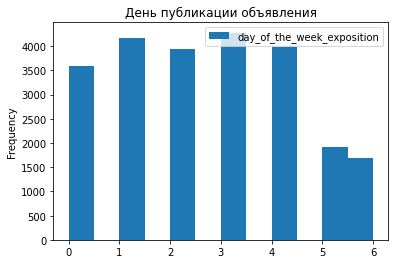

In [76]:
# изучим дни публикации объявлений
df.plot(kind='hist', title='День публикации объявления', y='day_of_the_week_exposition', \
                  bins=12, figsize=(6,4) )
plt.show()

Основное количество публикаций в будние дни.

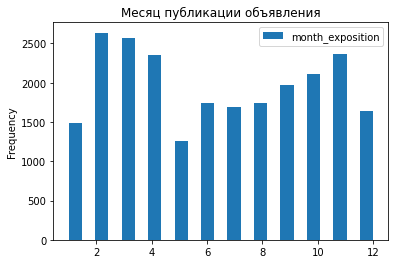

In [77]:
# изучим месяцы публикаций
df.plot(kind='hist', title='Месяц публикации объявления', y='month_exposition', \
                  bins=23, figsize=(6,4) )
plt.show()

Прослеживается некоторая сезонность подачи объявлений. Увеличение в начале года февраль-март и в конце года октябрь-ноябрь.

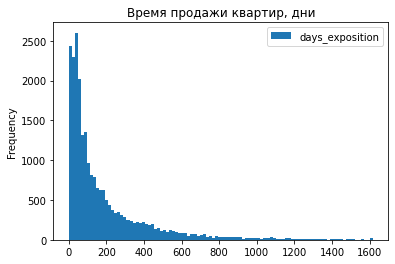

In [78]:
df.plot(kind='hist', title='Время продажи квартир, дни', y='days_exposition', \
                  bins=100, figsize=(6,4) )
plt.show()

In [79]:
df['days_exposition'].describe()

count    23564.000000
mean       185.765065
std        233.496447
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

In [80]:
# расссчитаем среднее количество дней и медиану
print('Среднее количество дней продажи', df['days_exposition'].mean())
print('Медиана по дням продажи', df['days_exposition'].median())

Среднее количество дней продажи 185.7650653539297
Медиана по дням продажи 94.0


Медиана по дням продажи 94 дня почти в два раза ниже среднего значения 185 дней. Очевидно это влияние длинных продаж дорогой элитной недвижимости и не снятых лотов (проданных или "забытых"), которые находятся в базе. В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных через месяц после публикации. А также есть варианты, которые продавались несколько десятков месяцев. 
Быстрой продажей можно назвать срок в 43 дня и меньше. Долгой продажей - 237 дней (7,5 месяцев) и дольше.

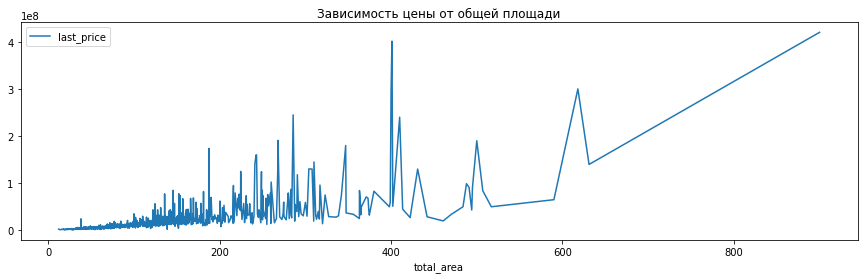

Коэффициент корреляции цены от общей площади 0.65


In [81]:
# зависимость цены от общей площади
df.pivot_table(index='total_area', values='last_price')\
.plot(style='-',title='Зависимость цены от общей площади', figsize=(15,4))
plt.show()
print('Коэффициент корреляции цены от общей площади', round(df['total_area']\
                                                            .corr(df['last_price']), 2))

На графике зависимости цены от общей площади виден минимальный разброс цен для площади до 120 кв.м, средний разброс цен от 120 до 180 кв.м, и максимальный разброс цен для площадей свыше 180 кв.м. Коэффициент корреляции = 0,65 - это подтверждает наличие зависимости.

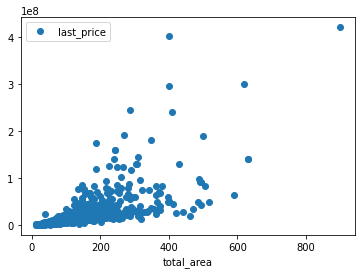

Корреляция общей цены и площади: 

            last_price  total_area
last_price     1.00000     0.73191
total_area     0.73191     1.00000 



In [82]:
# Зависимость цены от общей площади
(
    df.pivot_table(index='total_area', values='last_price')
    .plot(style='o', figsize=(6, 4))
)
plt.show()
print('Корреляция общей цены и площади:','\n')
print(df.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

Коэффициент корреляции цены от жилой площади 0.59


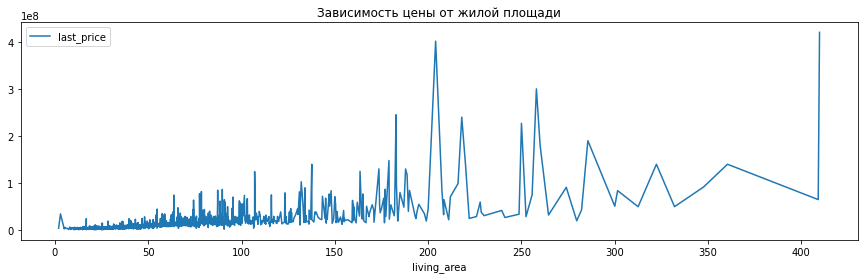

In [83]:
# зависимость цены от жилой площади
df.pivot_table(index='living_area', values='last_price')\
.plot(style='-',title='Зависимость цены от жилой площади', figsize=(15,4))
plt.show
print('Коэффициент корреляции цены от жилой площади', round(df['living_area']\
                                                            .corr(df['last_price']), 2))

На графике четкая зависимость для площади от 10 до 70 кв.м. Остальные значения площади более подвержены разбросу по цены. Расчет корреляции показывает незначительную зависимость цены от жилой площади.

Коэффициент корреляции цены от площади кухни 0.51


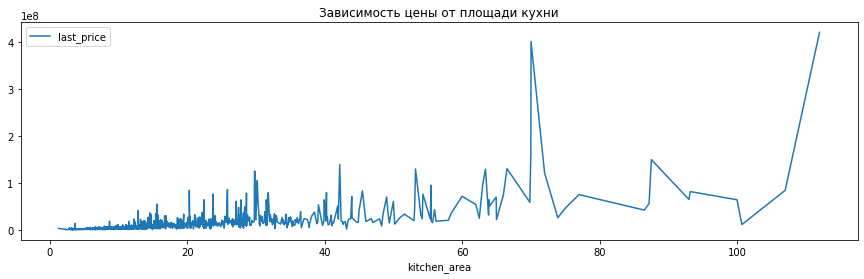

In [84]:
# зависимость цены от площади кухни
df.pivot_table(index='kitchen_area', values='last_price')\
.plot(style='-',title='Зависимость цены от площади кухни', figsize=(15,4))
plt.show
print('Коэффициент корреляции цены от площади кухни', round(df['kitchen_area']\
                                                            .corr(df['last_price']), 2))

График и расчёт корреляции показывают слабую зависимость цены от площади кухни.

Коэффициент корреляции цены от количества комнат 0.36


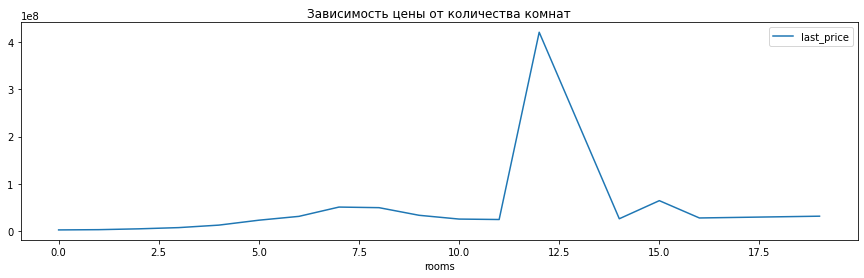

In [85]:
# зависимость цены от количества комнат
df.pivot_table(index='rooms', values='last_price')\
.plot(style='-',title='Зависимость цены от количества комнат', figsize=(15,4))
plt.show
print('Коэффициент корреляции цены от количества комнат', round(df['rooms']\
                                                                .corr(df['last_price']), 2))

Расчёт коэффициента корреляции Пирсона показывает очень слабую зависимости цены от количества комнат. 

In [86]:
# зависимость цены от этажа (первый, последний, другой) в цифрах все очевидно
df.pivot_table(index='floor_type', values='last_price', aggfunc='median')

,last_price
floor_type,
другой,4847000
первый,3900000
последний,4300000


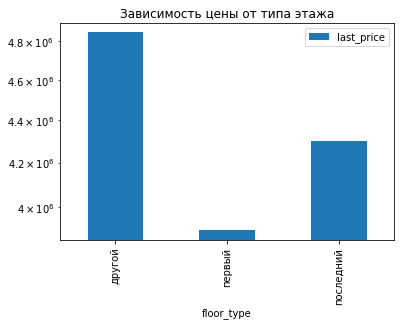

In [87]:
# для наглядности
df.pivot_table(index='floor_type', values='last_price', aggfunc=('median'))\
.plot(style='-',title='Зависимость цены от типа этажа', figsize=(6,4), kind='bar', logy=True)
plt.show()

Наиболее низкая стоимость у лотов первых этажей. Последние этажи на втором месте по дисконту. Дальше все остальные.

Коэффициент корреляции цены от дня недели размещения объявления 0


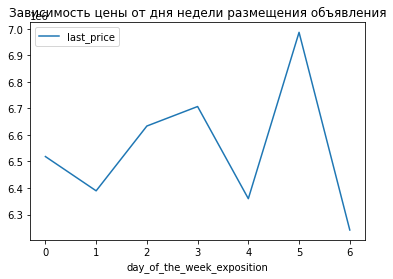

In [88]:
# зависимость цены от дня недели размещения объявления
df.pivot_table(index='day_of_the_week_exposition', values='last_price')\
.plot(style='-',title='Зависимость цены от дня недели размещения объявления', figsize=(6,4))
plt.show
print('Коэффициент корреляции цены от дня недели размещения объявления', round(df['day_of_the_week_exposition']\
                                                                               .corr(df['last_price'])))

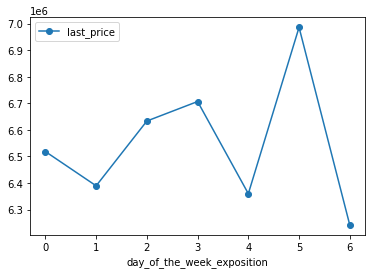

In [89]:
# зависимость цены от дня размещения без рассчета корреляции Пирсона
(
    df.pivot_table(index='day_of_the_week_exposition', values='last_price')
    .plot(style='o-', figsize=(6, 4))
)
plt.show()

Довольно волатительно все казалось бы. Но, если взять пики понедельника, четверга и субботы то рост цены очевиден и резкое снижение в воскресенье. Дороже всех опубликованные в четверг и субботу, дешевле в пятницу и воскресенье. 

Коэффициент корреляции цены от месяца размещения объявления 0.0


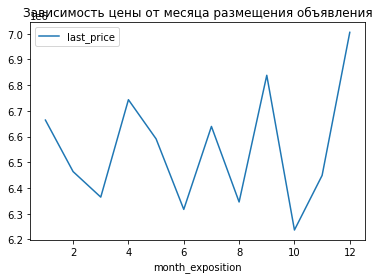

In [90]:
# зависимость цены от месяца размещения объявления
df.pivot_table(index='month_exposition', values='last_price')\
.plot(style='-',title='Зависимость цены от месяца размещения объявления', figsize=(6,4))
plt.show
print('Коэффициент корреляции цены от месяца размещения объявления', round(df['month_exposition']\
                                                                           .corr(df['last_price']), 2))

Коэффициент корреляции показывает отсутствие зависимости цены от месяца подачи объявления. Вместе с тем на графике зависимости прослеживается сезонность. Видны пики повышения стоимости в апреле, июле, сентябре. В марте, июне, августе и октябре заметил снижение цены.

Коэффициент корреляции цены от года размещения объявления -0.04


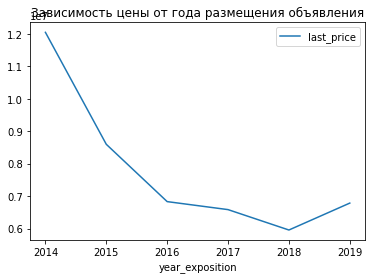

In [91]:
# зависимость цены от года размещения объявления
df.pivot_table(index='year_exposition', values='last_price')\
.plot(style='-',title='Зависимость цены от года размещения объявления', figsize=(6,4))
plt.show
print('Коэффициент корреляции цены от года размещения объявления', round(df['year_exposition']\
                                                                         .corr(df['last_price']), 2))

Зависимость по коэффициенту корреляции отсутствует. А вот по графику можно сказать, что квартиры очень сильно подешевели к 2016-2018 годах, что, вероятно, вызвано кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, вероятно это связано с экономическим ростом в стране в целом.

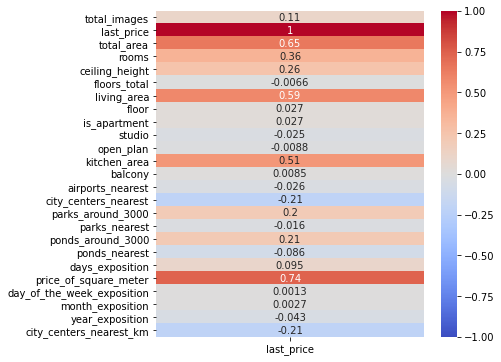

In [92]:
# попробую построить тепловую карту корреляции по столбцу last_price, 
# чтобы выявить параметры, которые оказывают наибольшее влияние на цену
plt.figure(figsize=(6,6))
upp_mat = np.triu(df.corr())
sns.heatmap(df.corr()[['last_price']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()

Не берем для анализа расчетную величину - цену квадратного метра. Тогда получается, что основной параметр влияющий на цену - это общая площадь (с ней увязаны жилая площадь и площадь кухни), второй значимый параметр - это количество комнат.

In [93]:
# рассчитаем среднюю цену одного кв. метра в 10 населённых пунктах с наибольшим числом объявлений
df.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean', 'median'])\
.sort_values(('count', 'last_price'), ascending=False)\
.head(10)\
.sort_values(('mean', 'last_price'), ascending=False)

,count,mean,median
,last_price,last_price,last_price
locality_name,,,
Санкт-Петербург,15650,8.065741e+06,5500000.0
Пушкин,369,6.469036e+06,5180000.0
Парголово,327,4.488075e+06,4100000.0
Кудрово,470,4.354895e+06,3887500.0
Шушары,439,4.109809e+06,3950000.0
Колпино,338,3.964021e+06,3600000.0
Всеволожск,398,3.789068e+06,3450000.0
Мурино,586,3.680841e+06,3400000.0


Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге и Пушкине. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Наименьшая стоимость в Гатчине и Выборге, городов с небольшим населением и удаленными от Санкт-Петербурга.

,price_of_square_meter
city_centers_nearest_km,
0.0,245833.111111
1.0,177004.963542
2.0,157848.564516
3.0,121507.367816
4.0,133282.422965
5.0,140453.507104
6.0,151011.750809
7.0,156176.445238
8.0,125649.319865


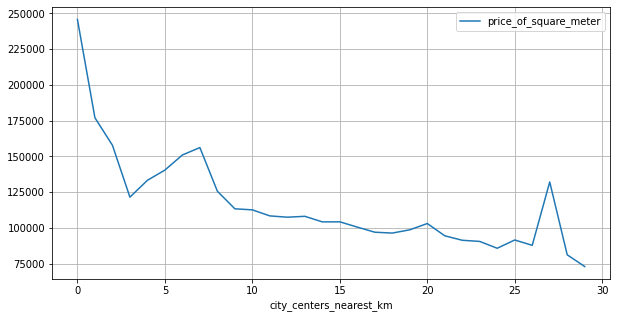

In [94]:
# Проанализируем квартиры в Санкт-Петербурге на предмет изменения цены 
# квадратного метра по мере удаления от центра города.
spb_df = df[df['locality_name'] == 'Санкт-Петербург']
spb_df_pivot= spb_df.pivot_table(index = 'city_centers_nearest_km',\
                                 values= 'price_of_square_meter', aggfunc='mean')
display(spb_df_pivot.head(10))
spb_df_pivot.plot(figsize=(10,5), grid=True)
plt.show()

По мере приближения с отметке 7 км до центра города СПб средняя цена квадратного метра уверенно растет до 156176 руб., далее наблюдается небольшое снижение цены до 121507 руб. и резкий рост до 0-го километра до 245833 руб. Про пик на 27-28 километре можно предположить наличие элитного жилого комплекса, например.

    ОБЩИЙ ВЫВОД:
    Представленные для анализа данные содержали информацию о конкретной квартире, выставленной на продажу. По каждой квартире доступны два вида данных. Первые заполнены пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
    В процессе предварительной обработки данных были выявлены явные и неявные пропуски, ошибки представления значений (значения, не соответствующие действительности). Скорее всего, данные взяты из разных источников, что является результатом пропусков значений в некоторых столбцах, а также предположительны ошибки при выгрузке и из-за некорректного заполнения первоисточников клиентом. Указанные проблемы были устранены.
    Для дальнейшего анализа рассчитаны и добавлены отдельными столбцами значения цены 1 кв.м., дня недели, месяца и года объявления, типа этажа квартиры, расстояние до центра города в км.
    В рамках проведенного исследования найдены определенные особенности и зависимости, существующие на рынке недвижимости региона. 
    Большинство квартир выставленных на продажу менее 100 квадратных метров. В подборке есть несколько очень больших вариантов с площадью более 200 квадратных метров. 
    Самые распространённые варианты квартир с жилой площадью от 10 до 50 метров. Более 80 метров встречаются в единичных случаях. 
    Основная стоимость квартир в районе 4-5 миллионов рублей. С увеличением цены объявлений становится значительно меньше. Есть яркие представители премиум сегмента в выборке с лидером цены в 763 миллиона рублей. 
    Большое количество предложений квартир до 5-ти этажей включительно. Это говорит о целом ряде предложений из домов пятиэтажной застройки. Также прослеживается вторая категория от 6 до 9 этажа. Вероятно все это дома ранней постройки. 
    В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Однако есть и варианты, где больше 7 комнат, их небольшое количество. А вот лидеры с 10-19 комнатами возможно представляют собой загородный дом.
    Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Есть варианты с высотой потолка 4 метра - такие существуют в домах новых проектах. 
    Большая часть лотов удалена от аэропорта на расстояние от 8 до 60 км. Это не удивительно, учитывая, что аэропорт Пулково для СПб и Ленобласти всего один.
    Прослеживается некоторое увеличение и сезонность подачи объявлений. В начале года февраль-март и в конце года октябрь-ноябрь.
    Медиана по дням продажи 94 дня почти в два раза ниже среднего значения 185 дней. Очевидно это влияние длинных продаж дорогой элитной недвижимости и не снятых лотов (проданных или "забытых"), которые находятся в базе. В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных через месяц после публикации. А также есть варианты, которые продавались несколько десятков месяцев. Быстрой продажей можно назвать срок в 43 дня и меньше. Долгой продажей - 237 дней (7,5 месяцев) и дольше.
    Наблюдается минимальный разброс цен для площади до 120 кв.м, средний разброс цен от 120 до 180 кв.м, и максимальный разброс цен для площадей свыше 180 кв.м. Коэффициент корреляции = 0,65 - это подтверждает наличие зависимости от общей площади квартиры. Установлено, что основной параметр влияющий на цену - это общая площадь (с ней увязаны жилая площадь и площадь кухни), второй значимый параметр - это количество комнат.
    Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге и Пушкине. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Наименьшая стоимость в Гатчине и Выборге, городов с небольшим населением и удаленными от Санкт-Петербурга.
    По мере приближения с отметке 7 км до центра города СПб средняя цена квадратного метра уверенно растет до 156176 руб., далее наблюдается небольшое снижение цены до 121507 руб. и резкий рост до 0-го километра до 245833 руб. Про пик на 27-28 километре можно предположить наличие элитного жилого комплекса, например.
    
    
